(128, 128)


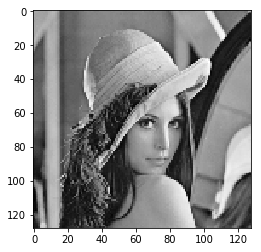

In [1]:
import cv2
import lbg
import compression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('./images/Lenna.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
print(img.shape)
plt.imshow(img, cmap='gray')

In [2]:
def generate_training(img, x, y):
    train_vec= []
    for i in range(0,img.shape[0], x):
        for j in range(0, img.shape[1], y):
            train_vec.append(img[i:i+x,j:j+y].reshape((x*y)))
    return(np.array(train_vec))            

In [3]:
train_X = compression.generate_training(img,(1,2))
print(train_X.shape)

(8192, 2)


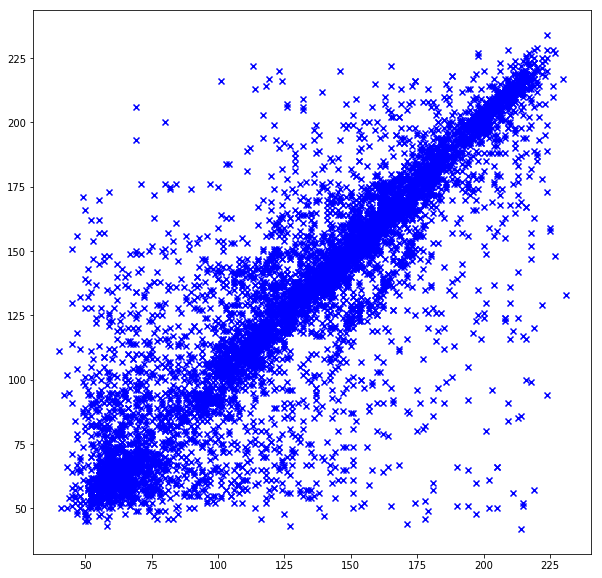

In [4]:
fig = plt.gcf()
plt.scatter([p[0] for p in train_X], [p[1] for p in train_X], marker='x', color='blue')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

In [5]:
%time cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(train_X, 64)

Wall time: 3min 47s


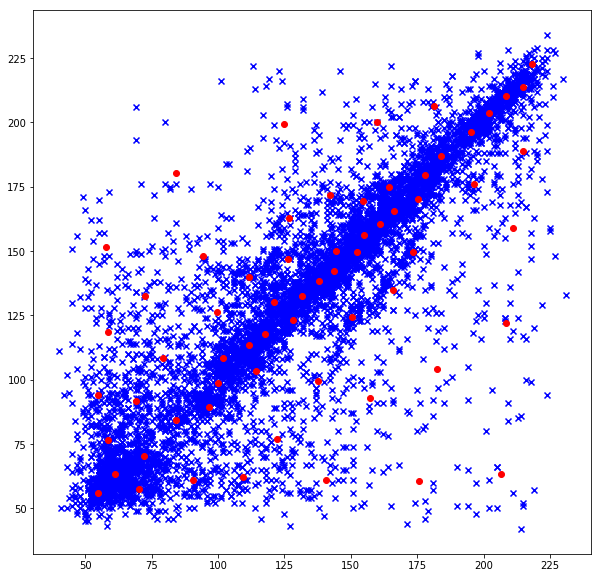

In [6]:
fig = plt.gcf()
plt.scatter([p[0] for p in train_X], [p[1] for p in train_X], marker='x', color='blue')
plt.scatter([p[0] for p in cb], [p[1] for p in cb], marker='o', color='red')
fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

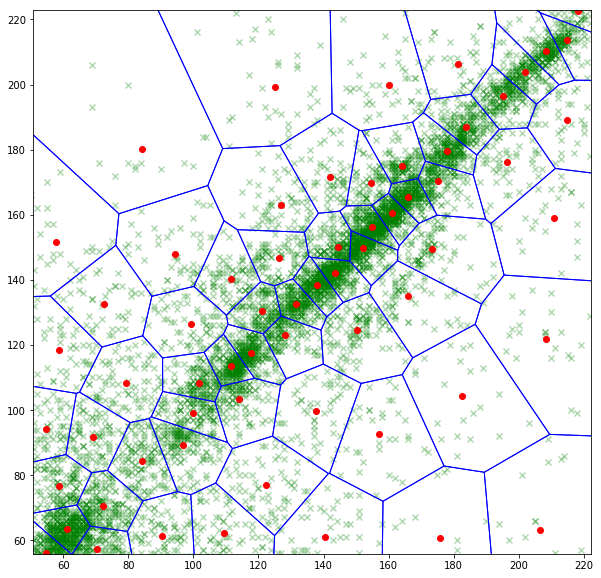

In [7]:
from plotting_utils import plot_voronoi 
from scipy.spatial import Voronoi

import matplotlib.patches as patches
vor = Voronoi(cb)

# plot
regions, vertices = plot_voronoi(vor)

# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), facecolor="none", edgecolor="b", linewidth=1.0)
    #plt.plot(*zip(*polygon), color = 'black')
    #patches.RegularPolygon(*zip(*polygon), fill = False)
    #plt.fill(*zip(*polygon), alpha=0.3)

fig = plt.gcf()
#plt.plot(points[:,0], points[:,1], 'ko')
plt.scatter([p[0] for p in train_X], [p[1] for p in train_X], marker='x', color='green', alpha=0.3)
plt.scatter([p[0] for p in cb], [p[1] for p in cb], marker='o', color='red')
plt.axis('equal')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

fig.set_figheight(10)
fig.set_figwidth(10)
plt.savefig('voro.png')
plt.show()

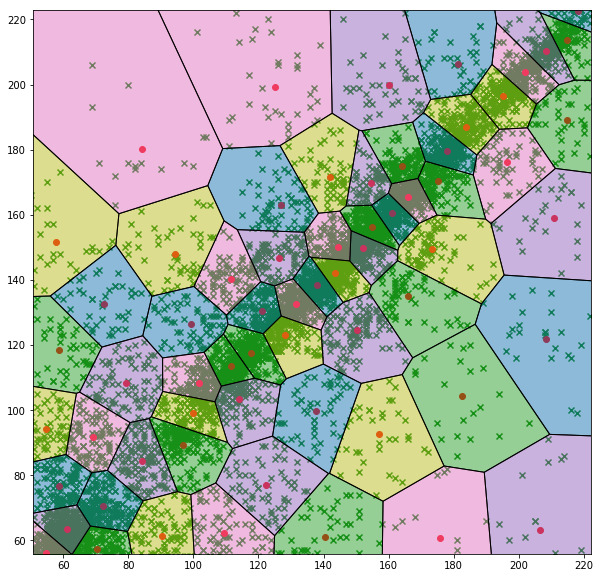

In [8]:
import matplotlib.patches as patches
vor = Voronoi(cb)

# plot
regions, vertices = plot_voronoi(vor)

fig = plt.gcf()
# colorize
for region in regions:
    polygon = vertices[region]   
    plt.fill(*zip(*polygon), alpha=0.5)
    plt.fill(*zip(*polygon), facecolor="none", edgecolor="black", linewidth=1.0)

#plt.plot(points[:,0], points[:,1], 'ko')
plt.scatter([p[0] for p in train_X], [p[1] for p in train_X], marker='x', color='green')
plt.scatter([p[0] for p in cb], [p[1] for p in cb], marker='o', color='red')
plt.axis('equal')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

fig.set_figheight(10)
fig.set_figwidth(10)
plt.savefig('filled_voro.png')
plt.show()